<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Árvores de Decisão: Classificação

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Módulo de Análise Exploratória
import aed

## Importação da base de dados

In [2]:
df_iris = pd.read_csv('iris2.csv', sep=',')
df_iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Preparação dos Dados

### Missing Values

In [3]:
df_iris.isnull().sum()

comprimento_sepala    0
largura_sepala        0
comprimento_petala    0
largura_petala        0
Tipo_Orquidea         0
dtype: int64

### Duplicações

In [4]:
df_iris.duplicated().sum()

1

In [5]:
df_iris.loc[df_iris.duplicated()]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
142,5.8,2.7,5.1,1.9,0


In [6]:
df_iris.loc[
    (df_iris['comprimento_sepala'] == 5.8)
    ]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
14,5.8,4.0,1.2,0.2,0
67,5.8,2.7,4.1,1.0,1
82,5.8,2.7,3.9,1.2,1
92,5.8,2.6,4.0,1.2,1
101,5.8,2.7,5.1,1.9,0
114,5.8,2.8,5.1,2.4,0
142,5.8,2.7,5.1,1.9,0


### Tipos de Variáveis

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  150 non-null    float64
 1   largura_sepala      150 non-null    float64
 2   comprimento_petala  150 non-null    float64
 3   largura_petala      150 non-null    float64
 4   Tipo_Orquidea       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Análise Exploratória dos Dados

### Dispersão por Classe

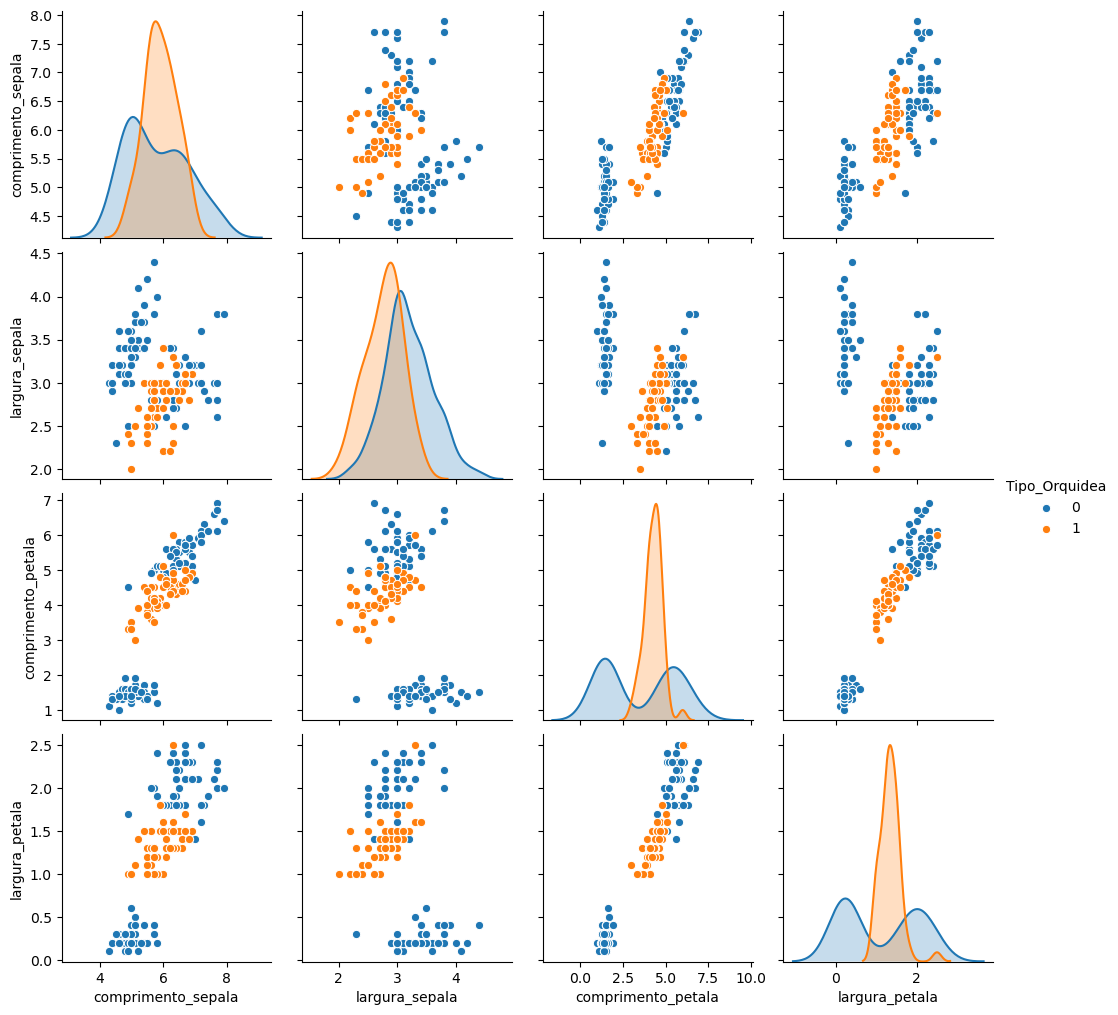

In [8]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df_iris, hue='Tipo_Orquidea');

### Information Value - IV

In [9]:
df_iris_iv = aed.analise_iv(df_iris, 
                            'Tipo_Orquidea',
                            nbins=5)
df_iris_iv.get_lista_iv()

,IV
Variavel,
comprimento_petala,2.99
largura_petala,2.56
comprimento_sepala,0.68
largura_sepala,0.60


In [10]:
df_iris_iv.get_bivariada(var_escolhida='comprimento_petala')

==> "comprimento_petala" tem IV de 2.99


Tipo_Orquidea,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,comprimento_petala,"(0.99, 1.5]",0,37,37,24.67,0.0,37.0,0.00,0.01,-4.61,0.00
1,comprimento_petala,"(1.5, 3.9]",11,13,24,16.00,22.0,13.0,45.83,1.69,0.52,0.05
2,comprimento_petala,"(3.9, 4.64]",28,1,29,19.33,56.0,1.0,96.55,56.00,4.03,2.22
3,comprimento_petala,"(4.64, 5.32]",10,20,30,20.00,20.0,20.0,33.33,1.00,0.00,0.00
4,comprimento_petala,"(5.32, 6.9]",1,29,30,20.00,2.0,29.0,3.33,0.07,-2.66,0.72


In [11]:
df_iris_iv.get_bivariada(var_escolhida='largura_petala')

==> "largura_petala" tem IV de 2.56


Tipo_Orquidea,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,largura_petala,"(0.09000000000000001, 0.2]",0,34,34,22.67,0.0,34.0,0.00,0.01,-4.61,0.00
1,largura_petala,"(0.2, 1.16]",10,16,26,17.33,20.0,16.0,38.46,1.25,0.22,0.01
2,largura_petala,"(1.16, 1.5]",34,4,38,25.33,68.0,4.0,89.47,17.00,2.83,1.81
3,largura_petala,"(1.5, 1.9]",5,18,23,15.33,10.0,18.0,21.74,0.56,-0.58,0.05
4,largura_petala,"(1.9, 2.5]",1,28,29,19.33,2.0,28.0,3.45,0.07,-2.66,0.69


### Relatórios Pandas Profiling e SweetViz

In [12]:
perfil_pp, perfil_sv = aed.gera_relatorios_aed(df=df_iris,
                                               target_feat='Tipo_Orquidea')

:comprimento_sepala:               |███████              | [ 33%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Desenvolvimento do Modelo: Árvores de Decisão
Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de *Machine Learning*.

### Definição do *Target* e das *Features*

In [13]:
# Target (variável resposta)
y = df_iris['Tipo_Orquidea']

# Features (variáveis explicativas)
x = df_iris.drop('Tipo_Orquidea', axis = 1)

### Treinamento da Árvore de Decisão

In [14]:
modelo_iris = DecisionTreeClassifier(max_depth=2, 
                                     random_state=42)
modelo_iris.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Avaliação do modelo treinado

#### Interpretação do Modelo

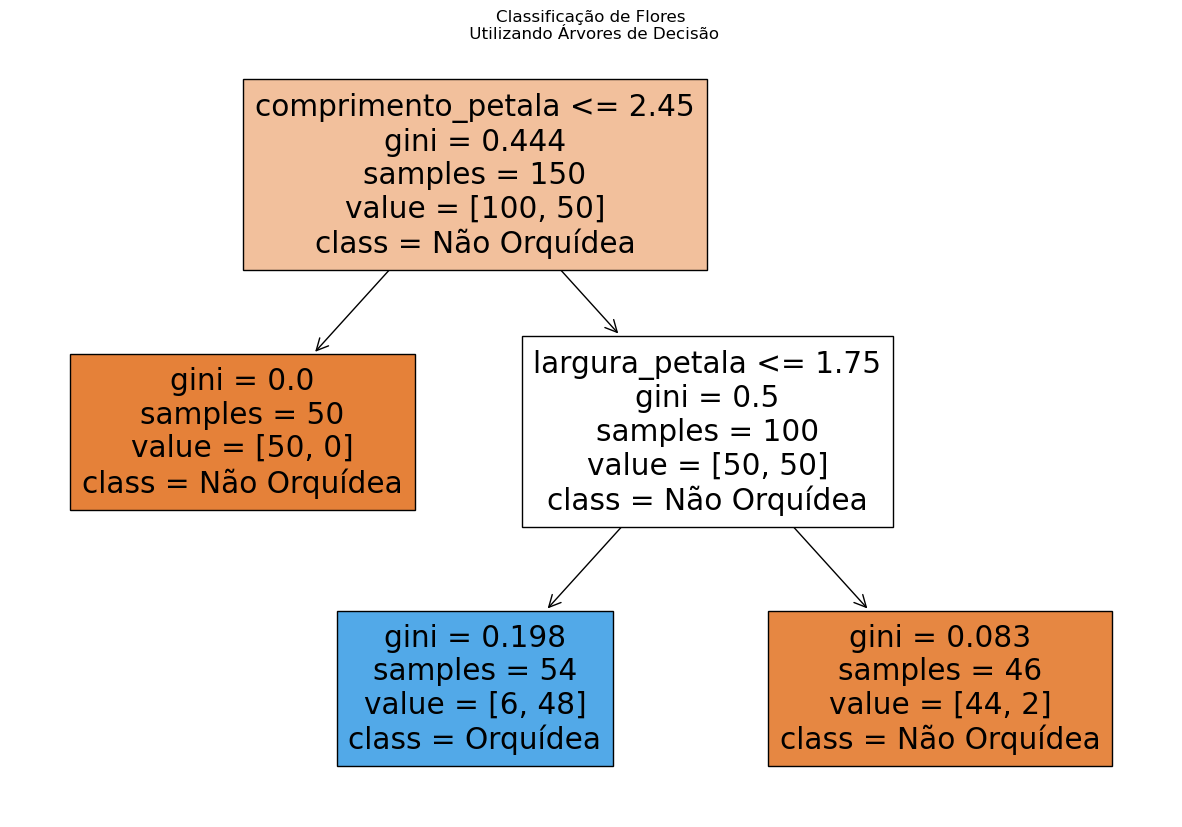

In [15]:
sns.reset_defaults()

%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_iris,
               feature_names=features,
               class_names=['Não Orquídea', 'Orquídea'],
               filled=True);
plt.title("Classificação de Flores\n Utilizando Árvores de Decisão");

d:\preditiva\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


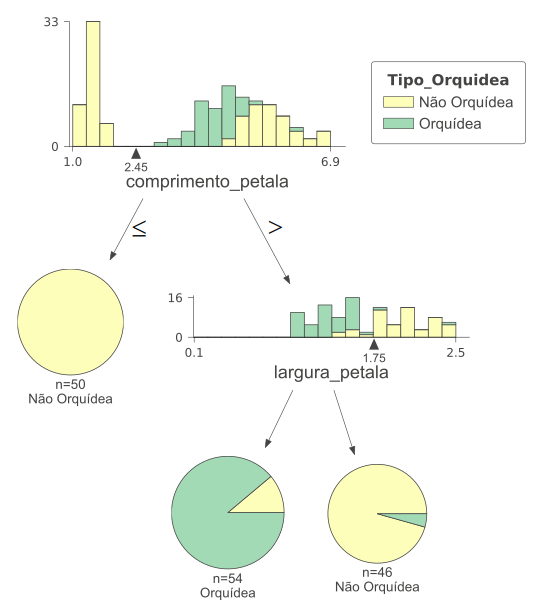

In [16]:
%matplotlib inline
viz = dtreeviz(tree_model=modelo_iris, 
               x_data=x, y_data=y, 
               target_name='Tipo_Orquidea',
               feature_names=features,
               class_names=['Não Orquídea', 'Orquídea'], 
               scale=2.0)
viz

#### Desempenho do Modelo

In [17]:
# Cálculo do desempenho do modelo: Acurácia
round(accuracy_score(y, modelo_iris.predict(x)),2)

0.95